# SOC In the Financial Markets - Group 2

## Imports

In [1]:
from networks import *
from plotting import *
from hypothesis_testing import *
from matplotlib import rcParams

## Parameters

In [2]:

# Trader Network parameters
num_traders = 1600           # Number of traders in the network
avg_degree = 4               # Average degree of the network
rewiring_probability = 0.2   # Probability of rewiring a link
percent_fund = 0.25          # Percent of fundametalists
percent_chart = 0.75         # Percent of Chartist



# Fundamentalist
phi = 1                      # Price sensitivity parameters
pf = 5000                    # Fundamentalist's fundamental price
# Information distribution
max_info = 0.01              # Maximum information that is distributed at each time step
alpha = 0.90                 # Fraction of information that will be distributed when active
global_prices = [5000]       # Global price list with initial price

# Noise terms
sigma = 100                  # Amplitude of noise
beta = 1                     # Exponent global price noise

avalanches = []              # List of avalanche sizes at each time step

info_list = [[],[]]

num_days = 500

network_params = [num_traders, avg_degree, rewiring_probability,percent_fund,percent_chart, phi]





## Price time series

In [3]:
network_params = [num_traders, avg_degree, rewiring_probability,percent_fund,percent_chart, phi]

# chartist, fundamentalist
chartist_fundamentalist_ratio = [[0,1],[0.75,0.25],[0.95,0.05],[1,0]]

networks = ['small_world']

In [4]:

#Create the data frame
df = create_data_frame(chartist_fundamentalist_ratio,networks,network_params, max_info, global_prices, alpha, sigma, beta, pf, info_list, avalanches, num_days)

Running simulation for network: small_world and ratio: [0, 1]
Running simulation for network: small_world and ratio: [0.75, 0.25]
Running simulation for network: small_world and ratio: [0.95, 0.05]
Running simulation for network: small_world and ratio: [1, 0]


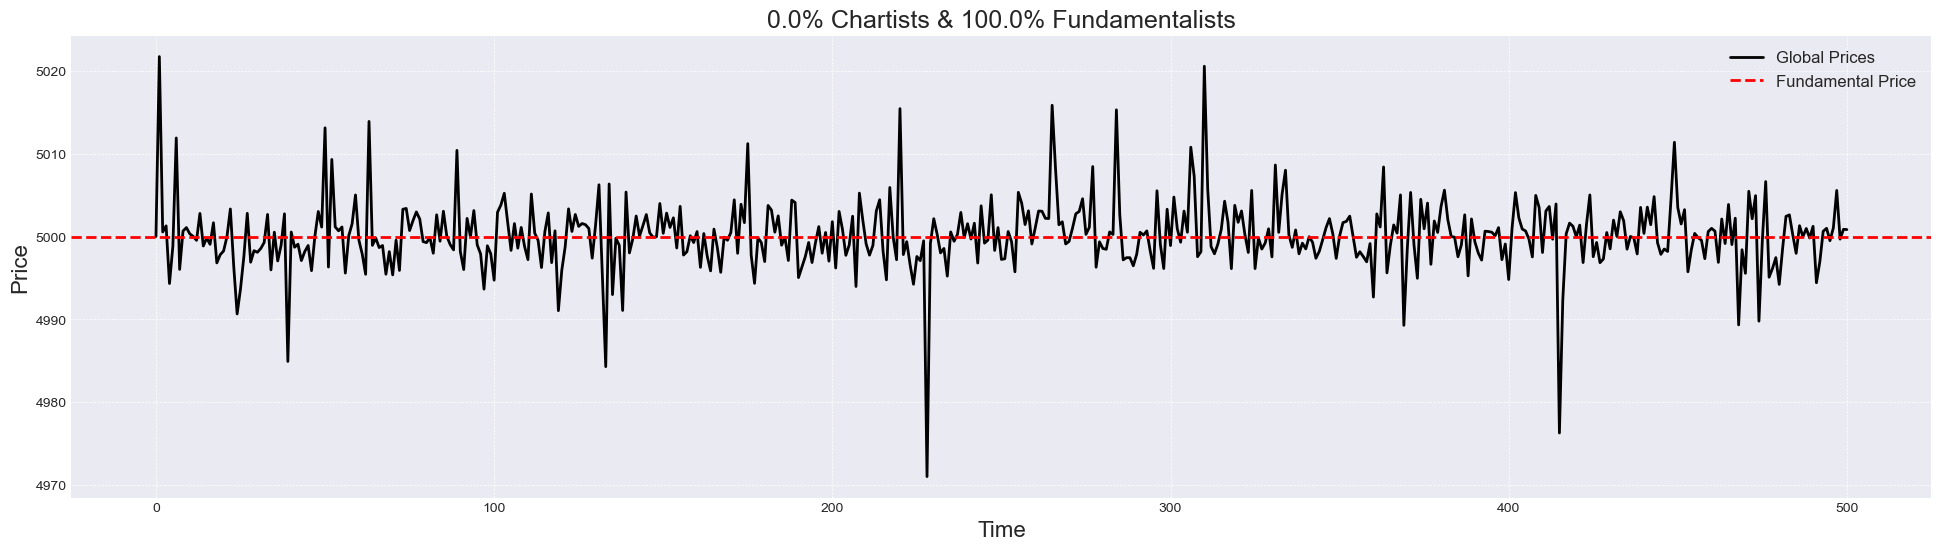

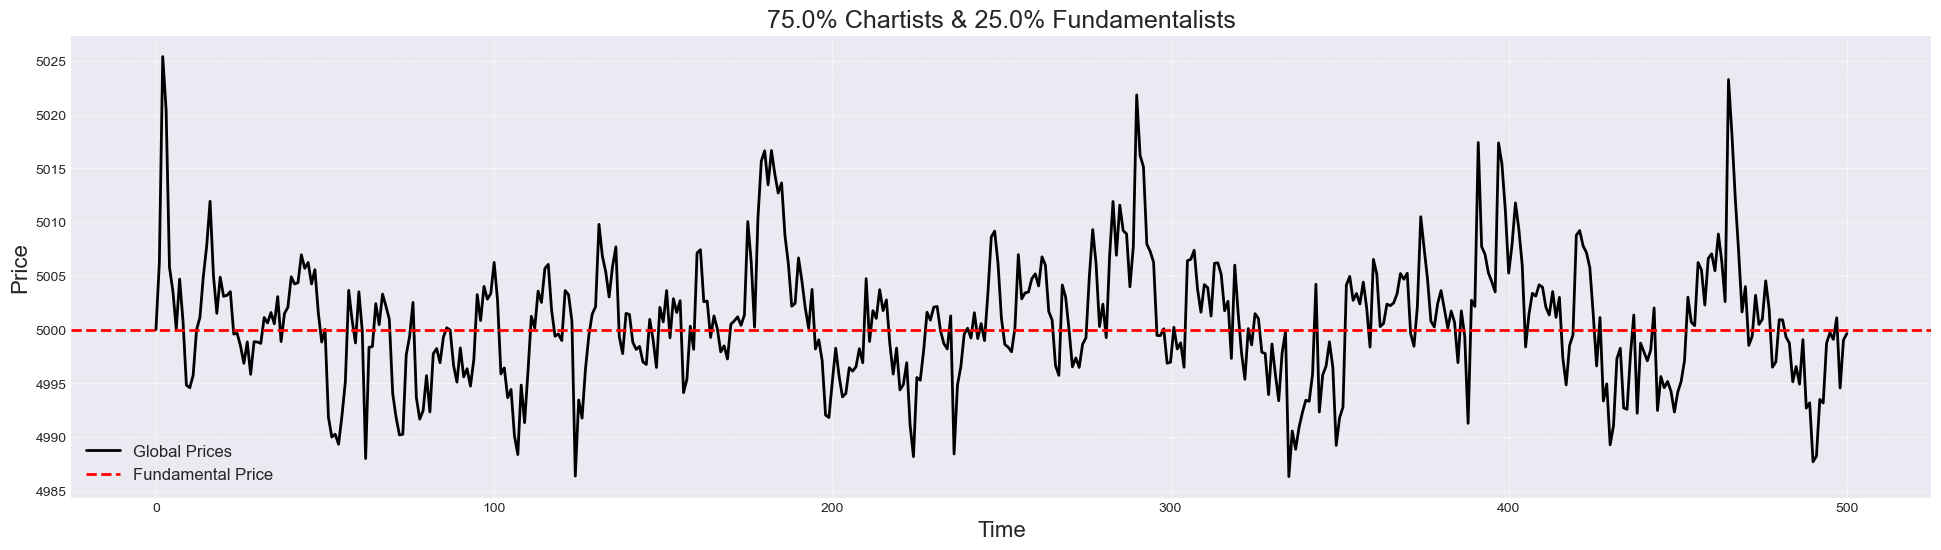

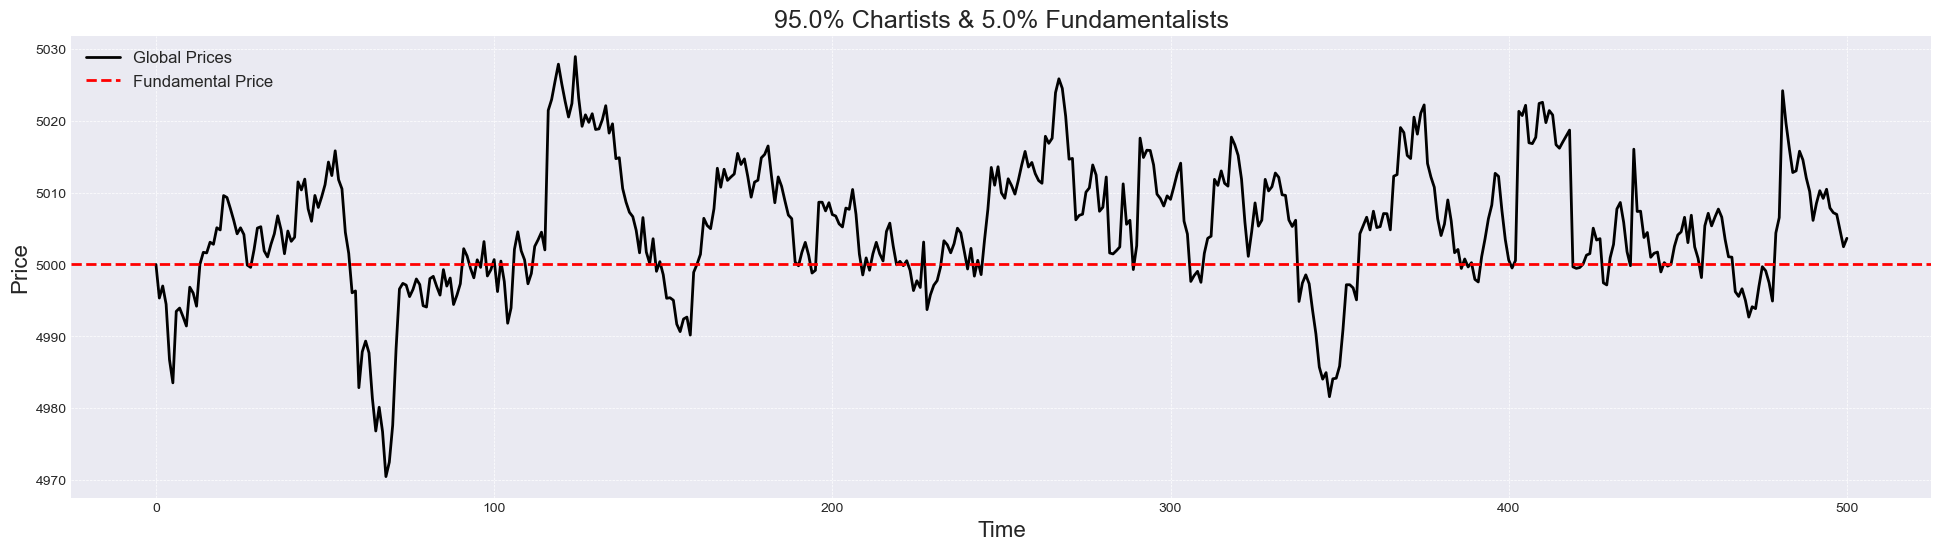

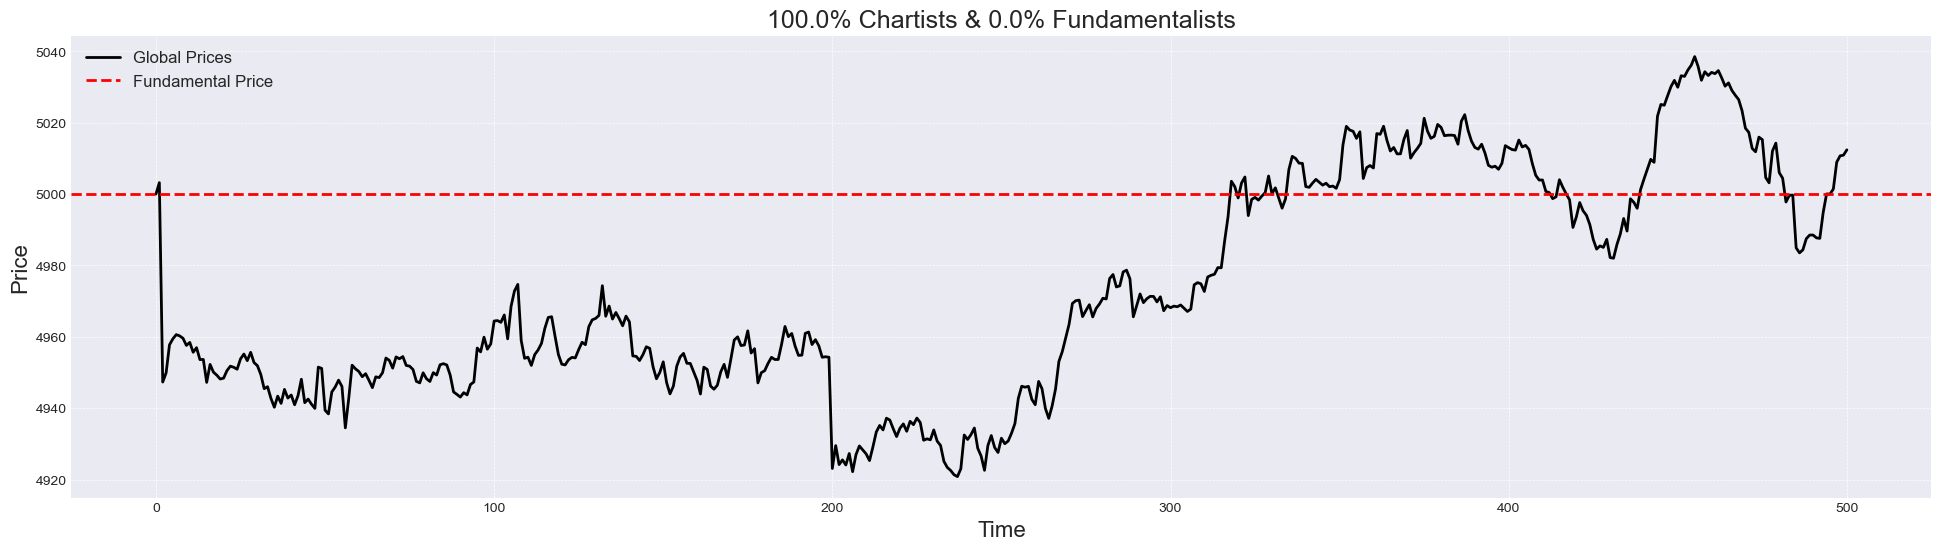

In [5]:
generate_price_plots(df)

### Showing how price goes towards the fundamental value

Running simulation for network: small_world and ratio: [1, 0]
Running simulation for network: small_world and ratio: [0.99, 0.01]


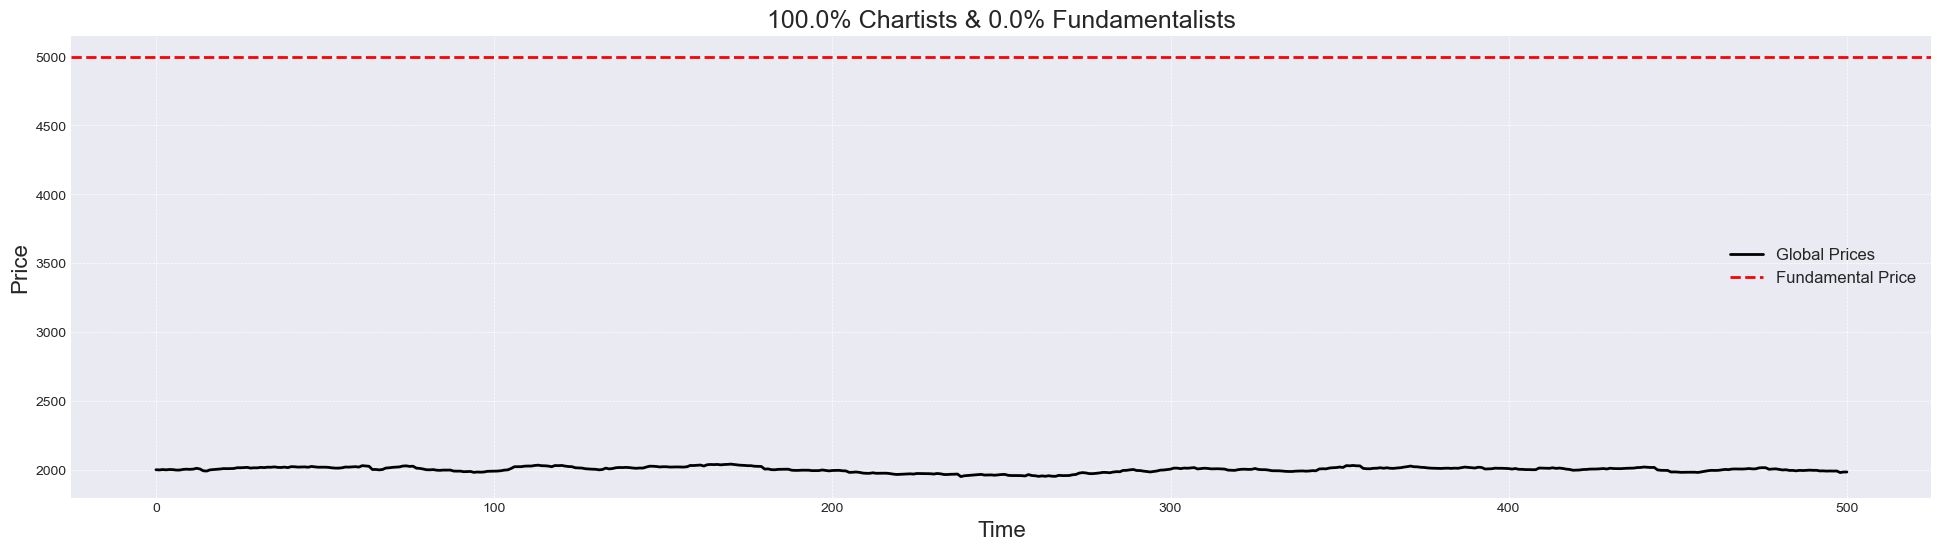

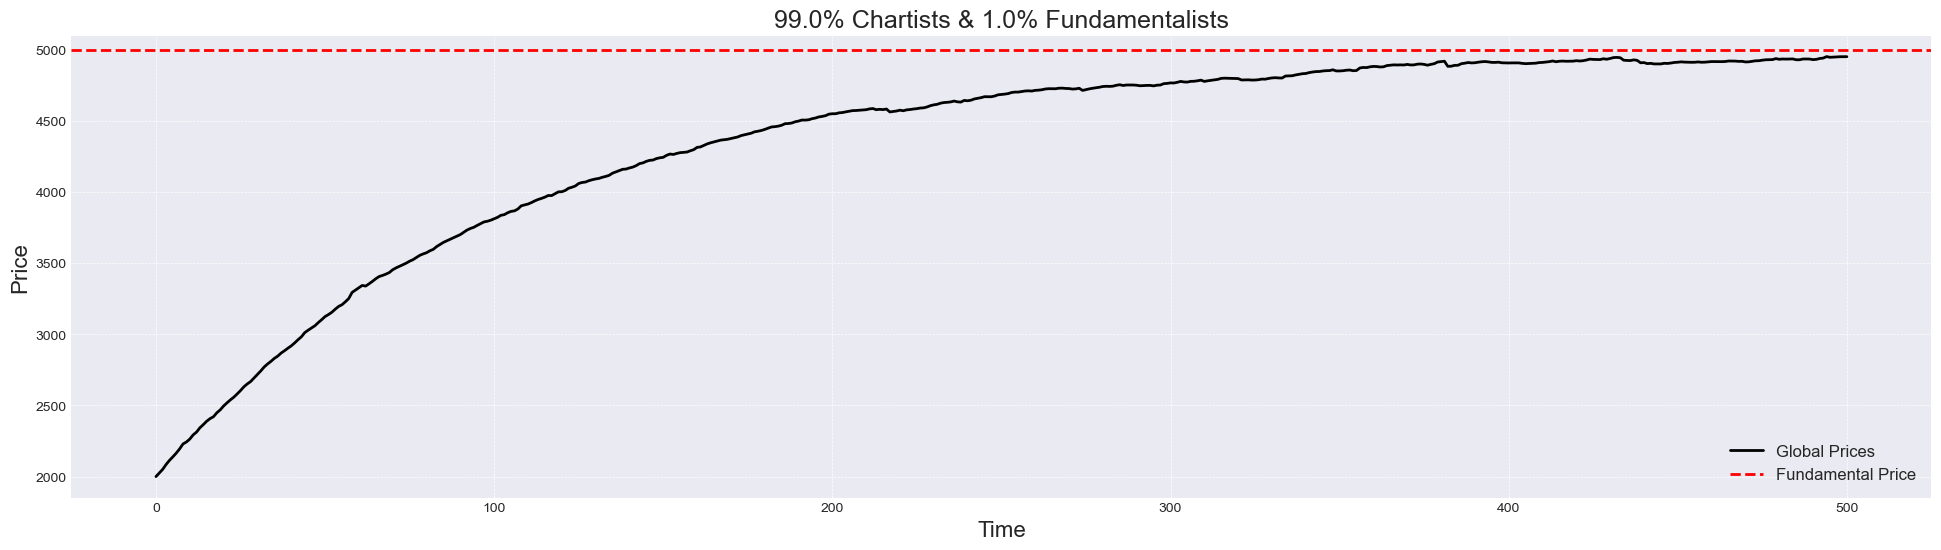

In [6]:
global_prices_2 = [2000]
chartist_fundamentalist_ratio = [[1,0],[0.99,0.01]]
df2 = create_data_frame(chartist_fundamentalist_ratio,networks,network_params, max_info, global_prices_2, alpha, sigma, beta, pf, info_list, avalanches, num_days)
generate_price_plots(df2)

## Information SOC Plots

### Average info, max info analysis 

In [5]:
#Extract relevant lists for 25% fundamentalists and 75% chartists
num_days = 10000
avalanches,avalanche_counter_current_time, avalanche_price_delta_list, global_prices, info_list, sum_avalanch_per_day = run_simulation(network_params, networks[0],max_info,global_prices,alpha,sigma, beta, pf, info_list,avalanches, num_days)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


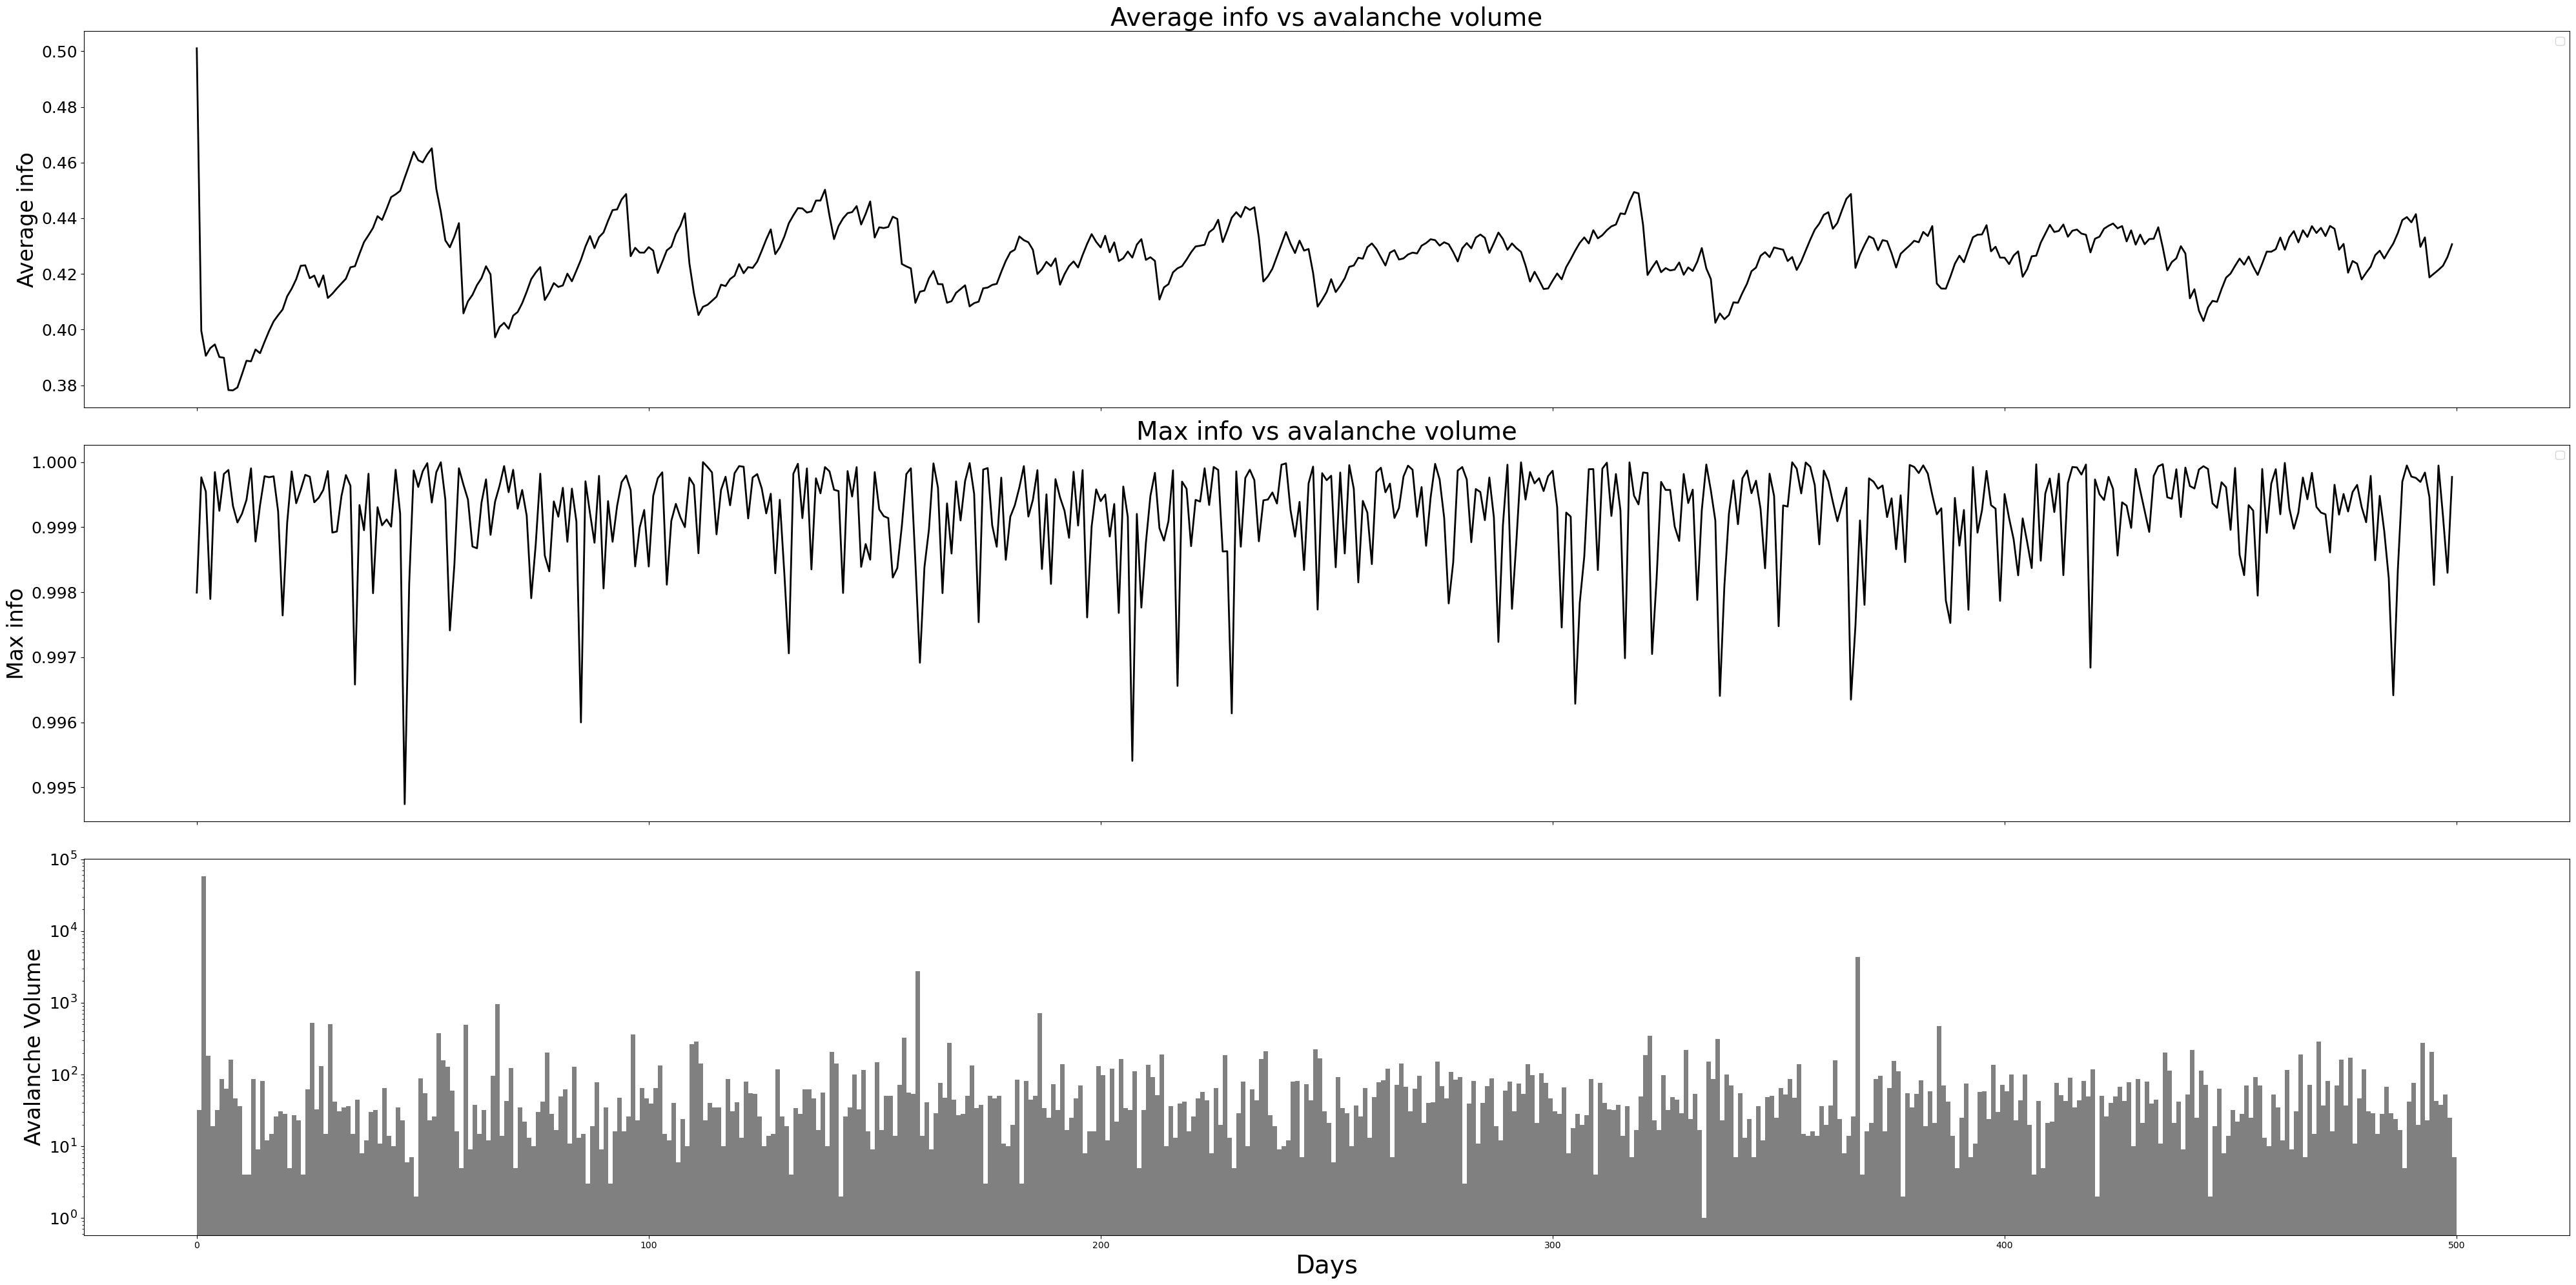

In [6]:
plot_average_and_max_info(global_prices, info_list,avalanches)

### Information avalanche power law for small world network

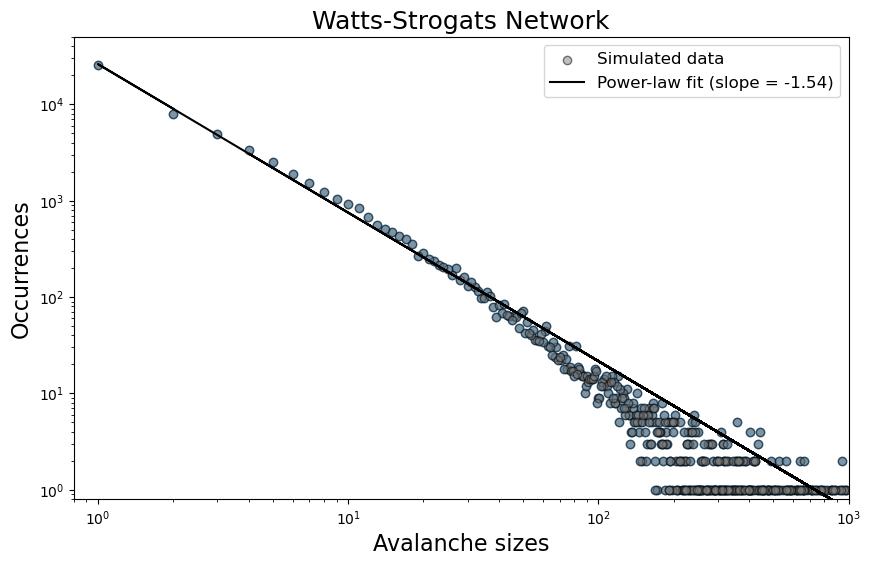

In [7]:
plot_info_power_law_wattz(avalanches)

### Hypothesis testing avalanch size power law for small world network

In [8]:
R,p = power_law_hypothesis_test(avalanches)
print(R,p)

Calculating best minimal value for power law fit
746.0565940497657 0.0008329407415689301


### Information avalanche power law for Barabasi network

In [3]:
#Extract relevant lists for 25% fundamentalists and 75% chartists
num_traders = 10000           # USING A GREATER NUMBER OF TRADERS TO MAKE SURE ITS SCALE FREE
networks = ['barabasi']       #Setting network to random network
num_days = 5000
alpha = 0.75
avalanches,avalanche_counter_current_time, avalanche_price_delta_list, global_prices, info_list, sum_avalanch_per_day = run_simulation(network_params, networks[0],max_info,global_prices,alpha,sigma, beta, pf, info_list,avalanches, num_days)


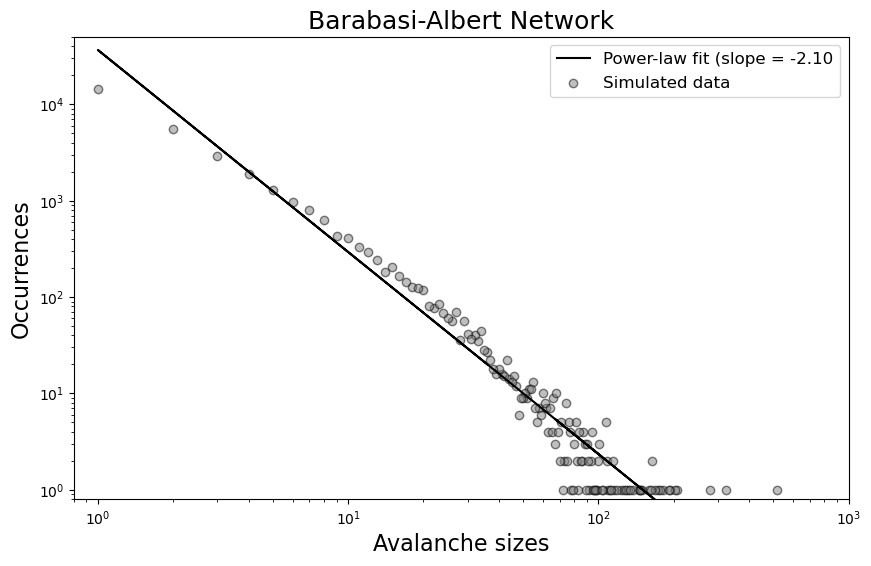

In [4]:
plot_info_power_law_barabasi(avalanches)

### Hypothesis testing avalanch size power law for Barabasi network

In [4]:
R,p = power_law_hypothesis_test(avalanches)
print(R,p)

Calculating best minimal value for power law fit
43.38978882088835 0.008000431451871615


## Price SOC plots

In [3]:
#Extract relevant lists for 25% fundamentalists and 75% chartists
num_days = 10000 
networks = ['small_world']
avalanches,avalanche_counter_current_time, avalanche_price_delta_list, global_prices, info_list, sum_avalanch_per_day = run_simulation(network_params, networks[0],max_info,global_prices,alpha,sigma, beta, pf, info_list,avalanches, num_days)

### Price power law Watz

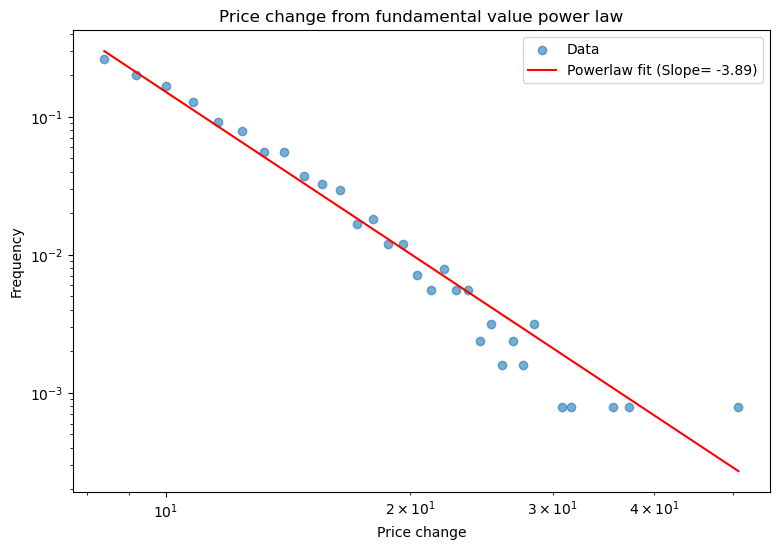

In [4]:
plot_price_change_power_law(global_prices,pf)

### Hypothesis test

In [4]:
R,p = power_law_hypothesis_test(avalanches)
print(R,p)

Calculating best minimal value for power law fit
558.7255436192282 4.90772003901826e-05


### Fat tail returns

In [5]:
#Compute normalised returns
normalized_returns = compute_normalised_returns(global_prices)


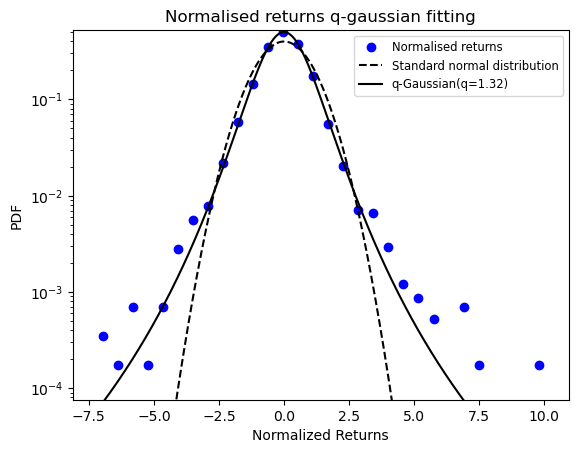

In [6]:
plot_fat_tail_returns(normalized_returns)

### QQ plot

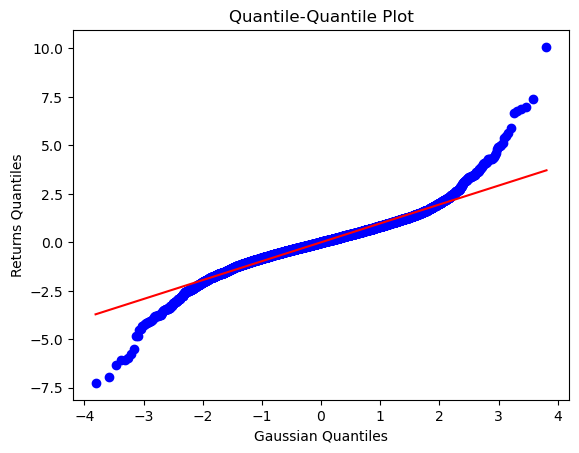

In [7]:
plot_qq_plot(normalized_returns)

### Price power law for Barabasi network

In [3]:
#Extract relevant lists for 25% fundamentalists and 75% chartists
num_traders = 10000           # USING A GREATER NUMBER OF TRADERS TO MAKE SURE ITS SCALE FREE
networks = ['barabasi']       #Setting network to random network
num_days = 5000
alpha = 0.75
avalanches,avalanche_counter_current_time, avalanche_price_delta_list, global_prices, info_list, sum_avalanch_per_day = run_simulation(network_params, networks[0],max_info,global_prices,alpha,sigma, beta, pf, info_list,avalanches, num_days)


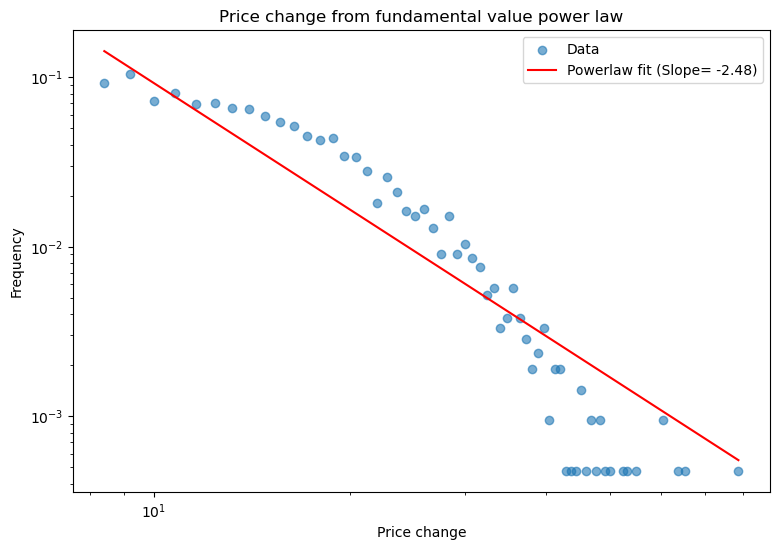

In [4]:
plot_price_change_power_law(global_prices,pf)

### Hypothesis test

In [5]:
R,p = power_law_hypothesis_test(avalanches)
print(R,p)

Calculating best minimal value for power law fit
25.249608425228512 0.03812949375397081


## Testing system robustness

### Hypothesis testing price change power law for different ratios of traders

In [3]:
num_days = 1000
networks = ['small_world']
fundamental_percentage_list = np.arange(0,1.05,0.05)
p_list,R_list =  multiple_runs_power_law_hypothesis_test(fundamental_percentage_list, network_params, networks ,max_info,global_prices,alpha,sigma, beta, pf, info_list,avalanches, num_days)

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/alex_1/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/rc/tn2ys5g55157vhhlmn0_vfwr0000gq/T/ipykernel_23928/1972944952.py", line 4, in <module>
    p_list,R_list =  multiple_runs_power_law_hypothesis_test(fundamental_percentage_list, network_params, networks ,max_info,global_prices,alpha,sigma, beta, pf, info_list,avalanches, num_days)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alex_1/Documents/GitHub/ComplexSystemsProject/Project Folder/hypothesis_testing.py", line 32, in multiple_runs_power_law_hypothesis_test
    avalanches,avalanche_counter_current_time, avalanche_price_delta_list, global_prices, info_list, sum_avalanch_per_day = run_simulation(netw

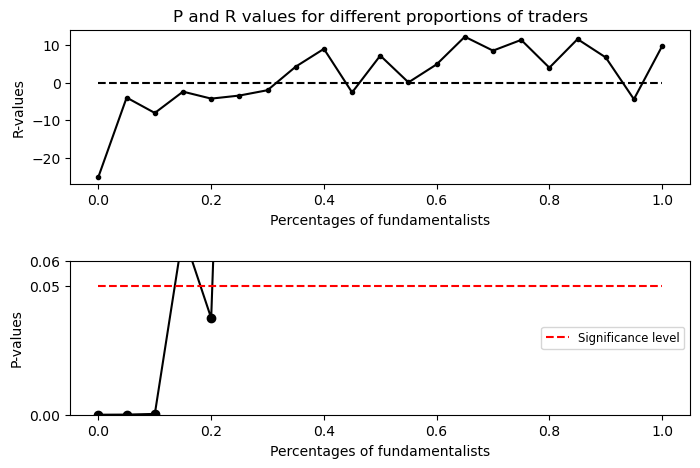

In [4]:
plot_p_values(fundamental_percentage_list, p_list, R_list)

## Proving model validity

In [3]:
# Extract relevant lists for 25% fundamentalists and 75% chartists
networks = ['small_world']       #Setting network to random network
num_days = 10000
global_prices = [5000]
avalanches,avalanche_counter_current_time, avalanche_price_delta_list, global_prices, info_list, sum_avalanch_per_day = run_simulation(network_params, networks[0],max_info,global_prices,alpha,sigma, beta, pf, info_list,avalanches, num_days)


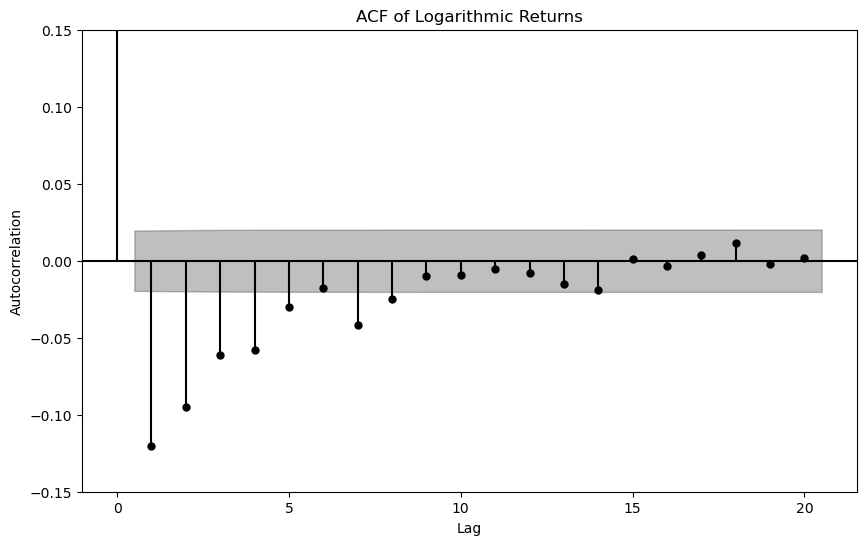

Ljung-Box Test P-Value: l
A high P-value suggests that there is no evidence against the null hypothesis, which is that there is no autocorrelation in the returns.
This is a part of the Efficient Market Hypothesis, suggesting that past returns cannot predict future returns.


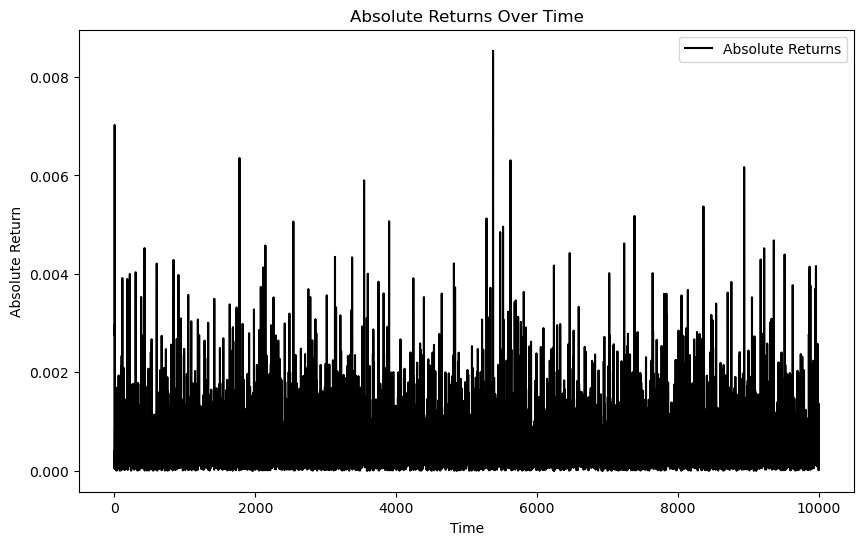

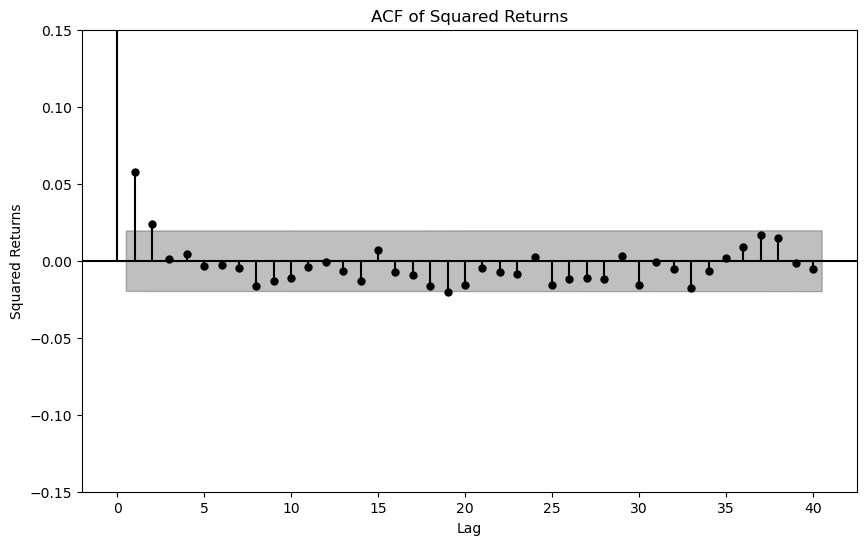

ARCH Test Statistic: 0.7108191140378628, p-value: 0.9999648121796285
The p-value not being below 0.05 suggests that there is no evidence for the null hypothesis, which is that there are ARCH (volatility clustering) effects.


In [4]:
stylized_facts(global_prices)